# Broadcasting

###### These are set of rules that Numpy uses to allow Universal Functions (Ufuncs) to work in arrays of different shapes, making array arithmetic efficient without needing to manually replicate data.

###### Normally, element-wise operations (like addition) require the arrays to have exactly the same shape:

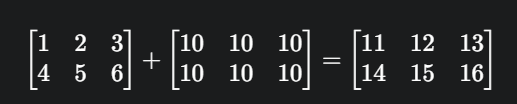

###### Without broadcasting, if you wanted to add 10 to every element of the first array, you would have to manually create the second $2 \times 3$ array of all $10$s. Broadcasting does this conceptually for you, saving memory and processing time.

In [ ]:
import numpy as np

In [8]:
# A (2x3 Matrix): Imagine 2 data samples with 3 features each
A = np.array([[10, 20, 30],
              [40, 50, 60]])
print("Matrix:\n", A)

# B (1x3 Vector): Imagine a bias term forthe 3 features
B = np.array([1, 2, 3])
print("Vector:\n", B)

Matrix:
 [[10 20 30]
 [40 50 60]]
Vector:
 [1 2 3]


##### Vector gets added to both the rows of the matrix

In [ ]:
print("A + B:\n", A + B)
# Output:
# [[11, 22, 33]  <- [10, 20, 30] + [1, 2, 3]
#  [41, 52, 63]]  <- [40, 50, 60] + [1, 2, 3]

A + B:
 [[11 22 33]
 [41 52 63]]


## Two Rules of Broadcasting

1. The dimensions are equal. (e.g., $3$ and $3$).
2. One of the dimensions is 1. (e.g., $1$ and $5$).

In [12]:
""" If neither of these rules is met, 
a ValueError: operands could not be broadcast together is raised.
"""

' If neither of these rules is met, \na ValueError: operands could not be broadcast together is raised.\n'

| Array A Shape | Array B Shape | Compatible? | Resulting Shape | Conceptual Action |
| :---: | :---: | :---: | :---: | :--- |
| **(5, 4)** | **(4,)** | $\checkmark$ (Rule 1: $4=4$) | **(5, 4)** | B is conceptually stretched across all 5 rows of A. |
| **(4, 1)** | **(4,)** | $\times$ (Rule 2 Fails: $1 \neq 4$) | **Error** | The dimensions 1 and 4 are incompatible. |
| **(5, 1)** | **(5, 6)** | $\times$ (Rule 2 Fails: $1 \neq 6$) | **Error** | The dimensions 1 and 6 are incompatible. |
| **(5, 1)** | **(1, 6)** | $\checkmark$ (Rule 2: $1$ vs $6$, then $5$ vs $1$) | **(5, 6)** | Both arrays are stretched to match the larger dimension. |